In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.layers import Dense, Dropout, Input, Flatten, Conv2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model

In [3]:
cifar10=tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
y_train,y_test=y_train.flatten(),y_test.flatten()

In [4]:
K=len(set(y_test))
print("Number of classses: ",K)

Number of classses:  10


In [5]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [6]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [7]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size


In [8]:
r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 1562 steps, validate on 10000 samples
Epoch 1/50
1562/1562 [==============================] - 39s 25ms/step - loss: 1.4302 - accuracy: 0.4929 - val_loss: 1.3722 - val_accuracy: 0.5140
Epoch 2/50
1562/1562 [==============================] - 33s 21ms/step - loss: 1.0575 - accuracy: 0.6246 - val_loss: 0.9031 - val_accuracy: 0.6782
Epoch 3/50
1562/1562 [==============================] - 32s 20ms/step - loss: 0.9193 - accuracy: 0.6774 - val_loss: 0.8509 - val_accuracy: 0.7015
Epoch 4/50
1562/1562 [==============================] - 32s 21ms/step - loss: 0.8403 - accuracy: 0.7080 - val_loss: 0.9640 - val_accuracy: 0.6677
Epoch 5/50
1562/1562 [==============================] - 33s 21ms/step - loss: 0.7813 - accuracy: 0.7279 - val_loss: 0.9499 - val_accuracy: 0.6829
Epoch 6/50
1562/1562 [==============================] - 33s 21ms/step - loss: 0.7302 - accuracy: 0.7466 - val_loss: 0.742

In [78]:
model.save("D://Downloads/new")  
#or tf.keras.models.save_model()
#or model.save("D://Downloads/new/my_model.h5")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: D://Downloads/new\assets


In [4]:
loaded_model=tf.keras.models.load_model("D://Downloads/new")

In [5]:
loaded_model.evaluate(x_train,y_train)

NameError: name 'x_train' is not defined

In [13]:
print("Training result: ",model.evaluate(x_train,y_train))
print("Testing result: ",model.evaluate(x_test,y_test))

50000/50000 [==============================] - 8s 160us/sample - loss: 0.2182 - accuracy: 0.9246
Training result:  [0.21816576461076737, 0.92464]
10000/10000 [==============================] - 2s 156us/sample - loss: 0.4642 - accuracy: 0.8518
Testing result:  [0.464178434830904, 0.8518]


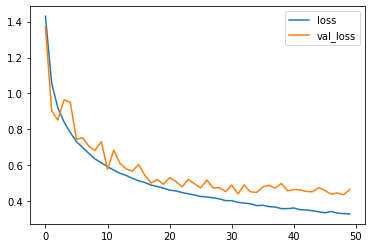

In [10]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

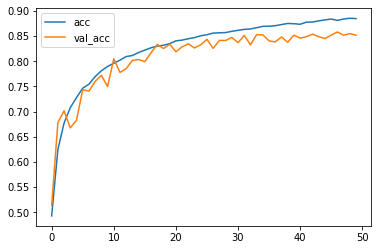

In [11]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [5]:
from tqdm import tqdm
import os
import cv2

In [6]:
TEST_DIR=r'D:\\Downloads\test1\test2'

In [7]:
def label_img(img):
    label=[img.split('.')[0]]
    return label

In [8]:
def process_test_data():
    testing_data=[]
    for img in tqdm(os.listdir(TEST_DIR)):
        path=os.path.join(TEST_DIR,img)
        label=label_img(img)
        img=cv2.imread(path)
        testing_data.append([np.array(img), np.array(label)])
    return testing_data

In [9]:
test_data=process_test_data()

100%|█████████████████████████████████████████████████████████████████████████| 300000/300000 [07:36<00:00, 657.75it/s]


In [10]:
len(test_data)

300000

In [11]:
test_data

[[array([[[ 78, 116, 134],
          [ 91, 127, 144],
          [ 92, 128, 145],
          ...,
          [ 72, 109, 130],
          [ 77, 110, 130],
          [ 76, 107, 125]],
  
         [[ 87, 125, 142],
          [ 95, 131, 146],
          [ 99, 134, 147],
          ...,
          [ 73, 113, 139],
          [ 82, 119, 141],
          [ 80, 112, 133]],
  
         [[ 87, 132, 143],
          [ 91, 146, 153],
          [ 93, 146, 150],
          ...,
          [ 78, 118, 142],
          [ 80, 116, 138],
          [ 84, 115, 134]],
  
         ...,
  
         [[125, 129, 143],
          [104, 112, 154],
          [121, 129, 159],
          ...,
          [ 91, 137, 120],
          [ 90, 135, 127],
          [ 72, 147, 139]],
  
         [[145, 150, 128],
          [120, 136, 132],
          [139, 151, 129],
          ...,
          [ 84, 132, 127],
          [ 63, 143, 134],
          [ 56, 127, 115]],
  
         [[134, 151,  82],
          [101, 130,  73],
          [104, 128,  77

In [12]:
xx_test=np.array([i[0] for i in test_data])
yy_test=np.array([i[1] for i in test_data])

In [13]:
print(xx_test.shape,yy_test.shape)

(300000, 32, 32, 3) (300000, 1)


In [14]:
xx_test

array([[[[ 78, 116, 134],
         [ 91, 127, 144],
         [ 92, 128, 145],
         ...,
         [ 72, 109, 130],
         [ 77, 110, 130],
         [ 76, 107, 125]],

        [[ 87, 125, 142],
         [ 95, 131, 146],
         [ 99, 134, 147],
         ...,
         [ 73, 113, 139],
         [ 82, 119, 141],
         [ 80, 112, 133]],

        [[ 87, 132, 143],
         [ 91, 146, 153],
         [ 93, 146, 150],
         ...,
         [ 78, 118, 142],
         [ 80, 116, 138],
         [ 84, 115, 134]],

        ...,

        [[125, 129, 143],
         [104, 112, 154],
         [121, 129, 159],
         ...,
         [ 91, 137, 120],
         [ 90, 135, 127],
         [ 72, 147, 139]],

        [[145, 150, 128],
         [120, 136, 132],
         [139, 151, 129],
         ...,
         [ 84, 132, 127],
         [ 63, 143, 134],
         [ 56, 127, 115]],

        [[134, 151,  82],
         [101, 130,  73],
         [104, 128,  77],
         ...,
         [ 70, 134, 127],
        

In [15]:
#xx_test=xx_test/255.0
yy_test=yy_test.flatten()

In [23]:
temp=np.array([int(i) for i in yy_test])

In [29]:
temp.shape

(300000,)

In [16]:
results = loaded_model.predict(xx_test)

In [17]:
results=results.argmax(axis=1) # select the indix with the maximum probability

In [18]:
results

array([3, 3, 3, ..., 5, 5, 3], dtype=int64)

In [42]:
labels='''airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck'''.split(',')

In [43]:
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [44]:
res=np.array([labels[i] for i in results])

In [45]:
res

array(['cat', 'cat', 'cat', ..., 'dog', 'dog', 'cat'], dtype='<U10')

In [46]:
import pandas as pd

In [48]:
res = pd.Series(res,name="label")
id_col = pd.Series(temp,name = "id")

submission = pd.concat([id_col,res],axis = 1)

submission.to_csv("submission_cifar10.csv",index=False)